Problem:
***Predict the price of gifts**

The problem is to build a predictive model that can determine the prices of different gift packages for an online retailer's special sale event. The model should utilize features such as categories and dates to make accurate price predictions.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
#Loading the train data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
test_data.shape

(13519, 16)

In [5]:
train_data.shape


(20279, 17)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20279 entries, 0 to 20278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            20279 non-null  object 
 1   gift_type          20279 non-null  int64  
 2   gift_category      20279 non-null  int64  
 3   gift_cluster       20279 non-null  int64  
 4   instock_date       20279 non-null  object 
 5   stock_update_date  20279 non-null  object 
 6   lsg_1              20279 non-null  int64  
 7   lsg_2              20279 non-null  int64  
 8   lsg_3              20279 non-null  int64  
 9   lsg_4              20279 non-null  int64  
 10  lsg_5              20279 non-null  int64  
 11  lsg_6              20279 non-null  int64  
 12  uk_date1           20279 non-null  object 
 13  uk_date2           20279 non-null  object 
 14  is_discounted      20279 non-null  int64  
 15  volumes            7323 non-null   float64
 16  price              202

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519 entries, 0 to 13518
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_id            13519 non-null  object 
 1   gift_type          13519 non-null  int64  
 2   gift_category      13519 non-null  int64  
 3   gift_cluster       13519 non-null  int64  
 4   instock_date       13519 non-null  object 
 5   stock_update_date  13519 non-null  object 
 6   lsg_1              13519 non-null  int64  
 7   lsg_2              13519 non-null  int64  
 8   lsg_3              13519 non-null  int64  
 9   lsg_4              13519 non-null  int64  
 10  lsg_5              13519 non-null  int64  
 11  lsg_6              13519 non-null  int64  
 12  uk_date1           13519 non-null  object 
 13  uk_date2           13519 non-null  object 
 14  is_discounted      13519 non-null  int64  
 15  volumes            11167 non-null  float64
dtypes: float64(1), int64(1

There are no null values in the dataset. So we'll not drop anything
We'll move further.

In [8]:
train_data.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [9]:
# Finding the correlation of data with our Y (price)
train_data.corr()

<ipython-input-9-ba442943c0c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
gift_type,1.000000,0.075328,-0.123263,0.369368,-0.063898,0.534393,0.055803,-0.073652,0.062589,-0.027933,0.083846,0.137145
gift_category,0.075328,1.000000,-0.138297,0.003494,-0.020970,-0.069802,0.053803,-0.339733,0.085429,0.011843,0.121377,0.286888
gift_cluster,-0.123263,-0.138297,1.000000,-0.106383,0.109072,0.067285,0.068613,0.146533,0.025014,0.063864,-0.010205,-0.282881
lsg_1,0.369368,0.003494,-0.106383,1.000000,-0.162152,0.524086,-0.126679,-0.125548,-0.033314,-0.193836,0.153268,0.147712
lsg_2,-0.063898,-0.020970,0.109072,-0.162152,1.000000,-0.037239,0.022979,0.040390,-0.039292,0.035532,0.101562,-0.185142
lsg_3,0.534393,-0.069802,0.067285,0.524086,-0.037239,1.000000,0.080235,-0.002776,0.067858,-0.120458,0.227968,0.006178
lsg_4,0.055803,0.053803,0.068613,-0.126679,0.022979,0.080235,1.000000,0.272718,0.371960,0.201302,0.066885,-0.222104
lsg_5,-0.073652,-0.339733,0.146533,-0.125548,0.040390,-0.002776,0.272718,1.000000,0.163077,0.094139,-0.014246,-0.525773
lsg_6,0.062589,0.085429,0.025014,-0.033314,-0.039292,0.067858,0.371960,0.163077,1.000000,0.122089,0.180311,-0.019769
is_discounted,-0.027933,0.011843,0.063864,-0.193836,0.035532,-0.120458,0.201302,0.094139,0.122089,1.000000,-0.021741,-0.157463


**FILTERING THE IMPORTANT DATA**

In [10]:
# Converting colummns to Data Time for difference
train_data['stock_update_date'] = pd.to_datetime(train_data['stock_update_date'], infer_datetime_format=True)

Ref: https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

Ref 2: https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes

In [17]:
train_data['instock_date'] = pd.to_datetime(train_data['instock_date'], infer_datetime_format=True)

In [18]:
train_data['stock_update_time'] = (train_data['stock_update_date'] - train_data['instock_date']).astype('timedelta64[h]')

#Difference of two columns in and putting it into a new column stock_update_time, values in (hours)


In [19]:
test_data['stock_update_date'] = pd.to_datetime(test_data['stock_update_date'], infer_datetime_format=True)

In [20]:
test_data['instock_date'] = pd.to_datetime(test_data['instock_date'], infer_datetime_format=True)

In [21]:
test_data['stock_update_time'] = (test_data['stock_update_date'] - test_data['instock_date']).astype('timedelta64[h]')


In [22]:
train_data['stock_update_time']

0        23818.0
1        23863.0
2        18293.0
3        23819.0
4        23814.0
          ...   
20274      117.0
20275      144.0
20276     1685.0
20277      142.0
20278      143.0
Name: stock_update_time, Length: 20279, dtype: float64

In [23]:
X_train = train_data[['gift_type','gift_category','stock_update_time', 'lsg_1', 'lsg_2','lsg_3','lsg_4','lsg_5','lsg_6','is_discounted']]
Y_train = train_data['price']

In [25]:
X_train

,gift_type,gift_category,stock_update_time,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted
0,61,534,23818.0,3377,5221,504,1912,10,554,0
1,61,534,23863.0,3377,5221,504,1912,10,554,1
2,584,262,18293.0,5290,1579,3203,1912,9,1578,1
3,61,534,23819.0,3377,5221,504,1912,10,554,0
4,61,534,23814.0,3377,5221,504,1912,9,554,1
...,...,...,...,...,...,...,...,...,...,...
20274,105,704,117.0,2055,6883,995,1912,10,1899,0
20275,1220,526,144.0,8323,6753,6706,1912,10,1899,0
20276,509,705,1685.0,2826,4009,2912,1912,10,1451,0
20277,682,213,142.0,2089,6883,3607,1912,10,822,0


In [26]:
Y_train

0        175.54
1         95.80
2        107.35
3        172.90
4         77.72
          ...  
20274     57.68
20275    122.87
20276     47.14
20277     47.68
20278     52.81
Name: price, Length: 20279, dtype: float64

In [27]:
print(test_data.columns)


Index(['gift_id', 'gift_type', 'gift_category', 'gift_cluster', 'instock_date',
       'stock_update_date', 'lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5',
       'lsg_6', 'uk_date1', 'uk_date2', 'is_discounted', 'volumes',
       'stock_update_time'],
      dtype='object')


In [31]:
X_test = test_data[['gift_type','gift_category','stock_update_time', 'lsg_1', 'lsg_2','lsg_3','lsg_4','lsg_5','lsg_6','is_discounted']]
X_test.head


<bound method NDFrame.head of        gift_type  gift_category  stock_update_time  lsg_1  lsg_2  lsg_3  \
0            842            663               93.0    203   1334   4358   
1            407            534              121.0   4785   5940   2582   
2            631            433               96.0   1812   5027   3427   
3            992            433               94.0   2002   6883   5537   
4             43            534              142.0   1512   6883    610   
...          ...            ...                ...    ...    ...    ...   
13514         31             65               71.0   3252   3211   7565   
13515         31             65               24.0   3252   3211   7565   
13516         31             65               24.0   3252   3211   7565   
13517        280            184               77.0   4198   3332   1805   
13518       1293            860               50.0   8780   1393   7359   

       lsg_4  lsg_5  lsg_6  is_discounted  
0       1912     10   189

In [34]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13519 entries, 0 to 13518
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gift_type          13519 non-null  int64  
 1   gift_category      13519 non-null  int64  
 2   stock_update_time  13519 non-null  float64
 3   lsg_1              13519 non-null  int64  
 4   lsg_2              13519 non-null  int64  
 5   lsg_3              13519 non-null  int64  
 6   lsg_4              13519 non-null  int64  
 7   lsg_5              13519 non-null  int64  
 8   lsg_6              13519 non-null  int64  
 9   is_discounted      13519 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.0 MB


In [ ]:
#error not fixing

ValueError: ignored

<ipython-input-35-71e4c13d6f40>:15: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(y_test), np.log(y_pred), c='blue', label='Actual vs. Predicted')


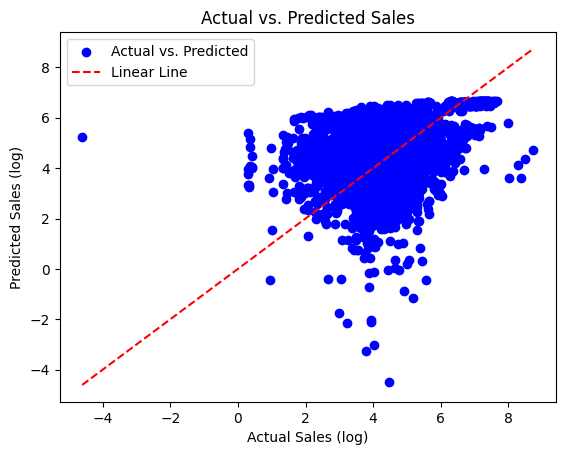

RMSE: 220.3979762562437


In [35]:
# Step 3: Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Step 5: Make predictions on the testing data
y_pred = model.predict(x_test)

# Step 6: Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Step 7: Generate the scatter plot with linear line
plt.scatter(np.log(y_test), np.log(y_pred), c='blue', label='Actual vs. Predicted')
plt.plot([np.log(y_test.min()), np.log(y_test.max())], [np.log(y_test.min()), np.log(y_test.max())], color='red', linestyle='--', label='Linear Line')
plt.xlabel('Actual Sales (log)')
plt.ylabel('Predicted Sales (log)')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()

# Print the RMSE
print("RMSE:", rmse)